# 8. Bayesian World
Three key terms for Bayesian Analysis...
* Likelihood
* Posterior
* Prior

Short Explanation:

    - Likelihood - Evaluation  
    - evidence - data/ feature vectors

     * Advocate is Hypothesis.. Judge is the likelihood.. Evidence is the data 
     * Judge will evaluate how likely is advocate's hypothesis over evidence
     
 Hypothesis is what type of distribution is it...Gaussian/uniform/etc
 
 Lets use same heigh-weight Dataset to evaluate likelihood 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/home/nari/Desktop/MY STUFFS/PYTHON/GetStartWith_MachineLearning/Datasets/weight-height.csv")

height = np.array(df['Height']) 
weight = np.array(df['Weight'])

# Statistical quantity 1: mean
mean_h = np.mean(height)
mean_w = np.mean(weight)

# Statistical quantity 2: Standard Deviation
std_h = np.std(height)
std_w = np.std(weight)

* Hypothesis No.1 : Data is generated from gausian distribution
* Hypothesis No.2 : Data is generated from Uniform Distribution
Joint likelihood ==> considering likelihood of all evidence 
* Find the Product of all indivdual independent evidence for each hypothesis



In [56]:
def gaussian(x, mean, std):
    den = np.sqrt(2*np.pi*std*std)
    num = np.exp(-1*(x-mean)*(x-mean)/(2*std*std)) 
    return num/den

def uniform(x,a,b):
    """" Data lies between a and b"""
    return (a<x) * (x<b) * (1/(b-a))   

def joint_likelihood(x, mean, std):
    # Probability that this function generated for x
    # Product of all evidences
    prod = 1
    for pts in x:
        prod = prod * func(pts, mean, std)
    return prod

def multiple_length(x):
    # Probability that this function generated for x
    # Product of all evidences
    prod = 1
    for pts in x:
        prod = prod * pts
    return prod

### For Reference: Gaussian Distribution Formula

$g(x,\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}{e^{-(x-\mu)^2/2\sigma^2}}$

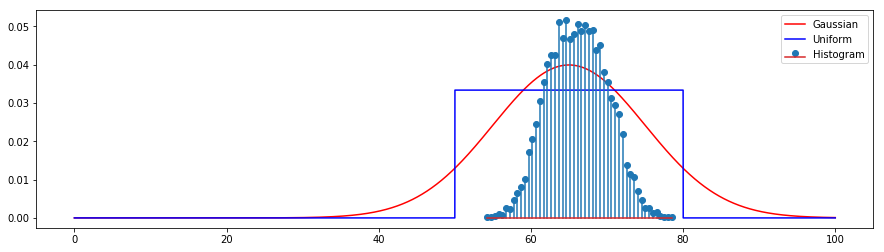

In [46]:
# plot Gaussian
x = np.arange(0,100, 0.001)

count, bins = np.histogram(df.Height, 50)
plt.figure(figsize = (15,4))
plt.plot(x, gaussian(x,65,10), c='r', label = "Gaussian")
plt.plot(x, uniform(x,50,80), c='b', label = "Uniform")
plt.stem(bins[:-1], count/9000, label = "Histogram")
plt.legend()

## 8.1 Calculating Likelihood
Find which Assumption(Hypothesis) is strong?

In [61]:
likelihood_gaussian = multiple_length(gaussian(df.Height[:100], 67, 10))
likelihood_uniform = multiple_length(uniform(df.Height[:100], 50, 80))
print(likelihood_gaussian, likelihood_uniform)

5.298359318250433e-143 1.9403252174826306e-148


In [62]:
likelihood_gaussian = likelihood_gaussian / (likelihood_gaussian+likelihood_uniform)
likelihood_uniform = likelihood_uniform / (likelihood_gaussian+likelihood_uniform)
print(likelihood_gaussian, likelihood_uniform)

## Note::
# which clearly indicates likelihood_gaussian has high score(99%) and won the verdict :)

0.9999963378887778 1.940332323195406e-148


## 8.2 Posterior Estimation

In [71]:
male_heights = df[df['Gender'] == 'Male']. Height
female_heights = df[df['Gender'] == 'Female']. Height

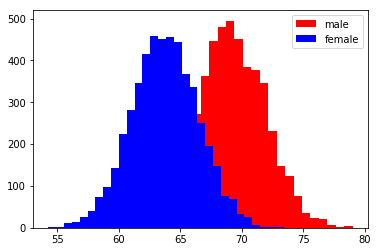

In [74]:
plt.hist(male_heights, bins = 30, color = 'r', label = 'male')
plt.hist(female_heights, bins = 30, color = 'b', label = 'female')
plt.legend()

In [79]:
# calculate posterior (Evidence is given)
male_distribution  = gaussian(male_heights, mean = 69, std=3)
female_distribution = gaussian(female_heights, mean = 63.5, std=3)

In [84]:
person_height = 63
prob_female = gaussian(person_height, mean = 63.5, std=3)
prob_male = gaussian(person_height, mean = 69, std=3)
total = prob_female + prob_male
print(prob_female/total, prob_male/total)

0.8793311039877206 0.12066889601227938
